# Data pipeline

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import random

In [23]:
images = os.listdir(r"C:\Users\Nicolas Boizard\OneDrive - JUNIA Grande école d'ingénieurs\M2\AI\Multi-Video-Temporal-Synchronization\datasets\ISIA\0\left")
len(images)

11946

In [109]:
path = r"C:\Users\Nicolas Boizard\OneDrive - JUNIA Grande école d'ingénieurs\M2\AI\Multi-Video-Temporal-Synchronization\datasets\ISIA"

# Create a wrong pair of images dataset.
leftWrong = tf.keras.utils.image_dataset_from_directory(
  fr"{path}/0/left",
  color_mode="grayscale",
  image_size=(224, 224),
  batch_size=None,
  labels=None,
  shuffle=False)
leftWrong = leftWrong.map(lambda x: x/255)

rightWrong = tf.keras.utils.image_dataset_from_directory(
  fr"{path}/0/right",
  color_mode="grayscale",
  image_size=(224, 224),
  batch_size=None,
  labels=None,
  shuffle=False)

wrong = tf.data.Dataset.zip((leftWrong, rightWrong))


# Create a dataset of correct pair images.
leftPair = tf.keras.utils.image_dataset_from_directory(
  fr"{path}/1/left",
  color_mode="grayscale",
  image_size=(224, 224),
  batch_size=None,
  labels=None,
  shuffle=False)

rightPair = tf.keras.utils.image_dataset_from_directory(
  fr"{path}/1/right",
  color_mode="grayscale",
  image_size=(224, 224),
  batch_size=None,
  labels=None,
  shuffle=False)

pair = tf.data.Dataset.zip((leftPair, rightPair))


# Create labels
wrongLables = tf.zeros([len(images)])
wrongLables = tf.data.Dataset.from_tensor_slices(wrongLables)
wrong = tf.data.Dataset.zip((wrong, wrongLables))

pairLabels = tf.ones([len(images)])
pairLabels = tf.data.Dataset.from_tensor_slices(pairLabels)
pair = tf.data.Dataset.zip((pair, pairLabels))

dataset = pair.concatenate(wrong)
datasetBis = wrong.concatenate(pair)

dataset = tf.data.Dataset.sample_from_datasets([pair, wrong], weights=[0.5, 0.5])

Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.
Found 11946 files belonging to 1 classes.


## Split dataset

In [110]:
ds_train=dataset.take(200)
ds_test=dataset.skip(200)


In [111]:
ds_train=ds_train.shuffle(200)

## Preview images

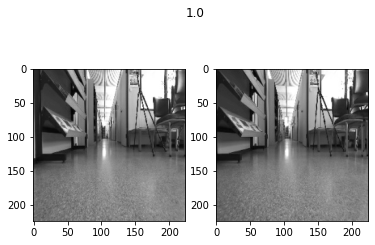

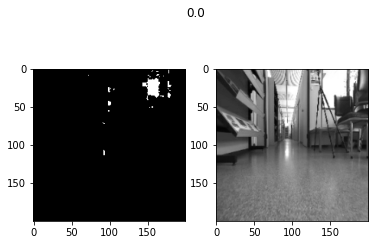

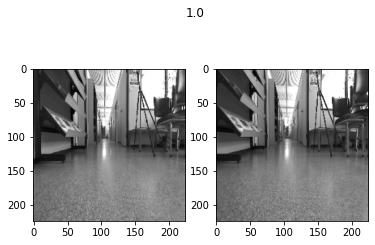

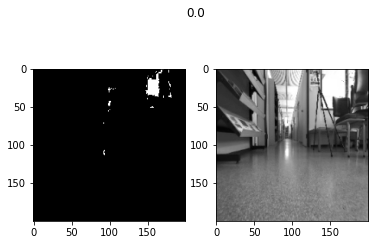

In [112]:
for images, labels in ds_train.take(10):
    f, axarr = plt.subplots(1,2)
    f.suptitle(labels.numpy())
    axarr[0].imshow(images[0][:,:,0].numpy().astype("uint8"), cmap='gray')
    axarr[1].imshow(images[1][:,:,0].numpy().astype("uint8"), cmap='gray')